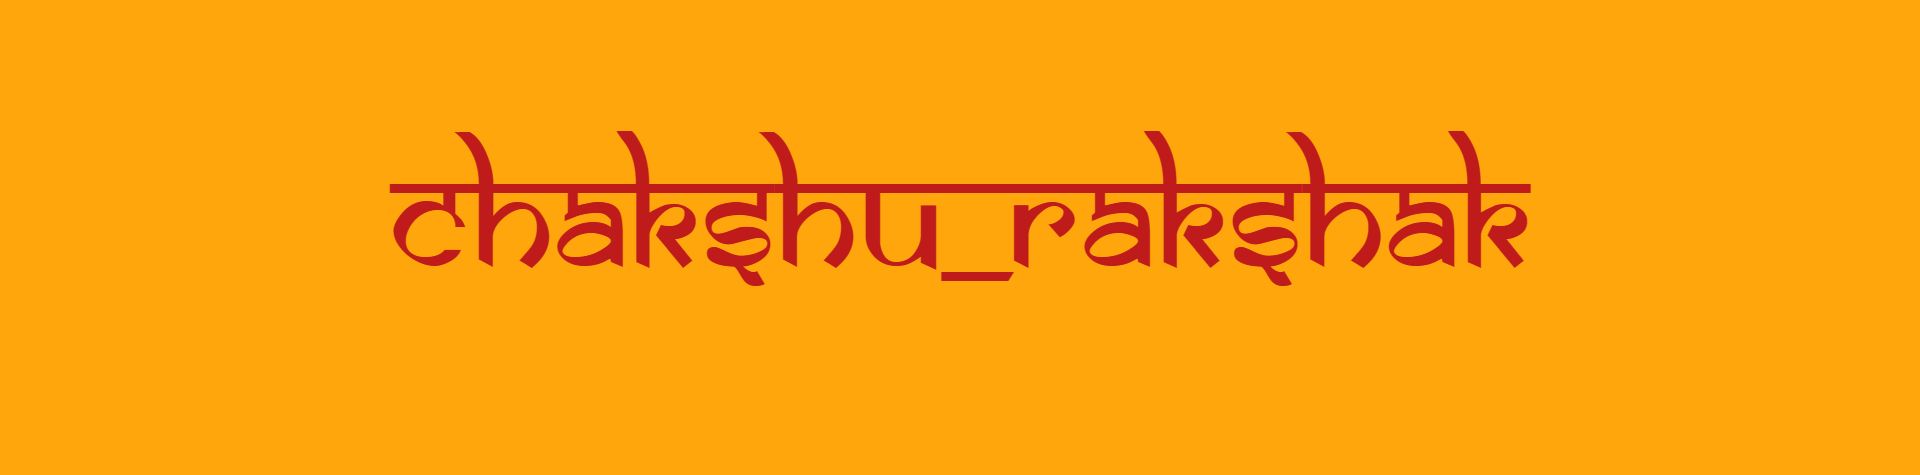

###**Mounting Google Drive to access Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Importing essential libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import numpy as np
import cv2
import os

###**Rescaling Data**

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

###**Importing Training and Validation Data**

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/CodeDay/TrainingDataset",
                                          target_size = (200,300),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/CodeDay/ValidationDataset",
                                                    target_size = (200,300),
                                                    batch_size = 3,
                                                    class_mode = 'binary')

###**Assigning labels to classes**

In [ ]:
class_names = train_dataset.class_indices
print(class_names)

{'0_Normal_Eye': 0, '1_Cataract_Eye': 1}


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

###**Convolutional Neural Network Model**

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,300,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   layers.Dropout(0.2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   
                                   tf.keras.layers.Dense(1, activation = 'sigmoid'),
                                   ]
                                   )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 147, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 35, 64)       0

###**Data Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(200,
                                  300,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

###**Model Compilation**

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


###**Training the Model**

In [ ]:
epochs = 50

model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     validation_data = validation_dataset,
                     epochs = epochs)

Epoch 1/50
3/3 [==============================] - 21s 10s/step - loss: 0.2575 - accuracy: 0.7778 - val_loss: 0.4888 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 21s 10s/step - loss: 1.5853 - accuracy: 0.6667 - val_loss: 0.5408 - val_accuracy: 0.7566
Epoch 3/50
3/3 [==============================] - 20s 10s/step - loss: 0.4751 - accuracy: 0.7778 - val_loss: 0.5787 - val_accuracy: 0.6579
Epoch 4/50
3/3 [==============================] - 20s 10s/step - loss: 0.5157 - accuracy: 0.6667 - val_loss: 0.7757 - val_accuracy: 0.5855
Epoch 5/50
3/3 [==============================] - 21s 10s/step - loss: 0.7443 - accuracy: 0.5556 - val_loss: 0.4980 - val_accuracy: 0.7763
Epoch 6/50
3/3 [==============================] - 20s 10s/step - loss: 0.4503 - accuracy: 0.8889 - val_loss: 0.5341 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 20s 10s/step - loss: 0.6409 - accuracy: 0.6667 - val_loss: 0.4583 - val_accuracy: 0.7697
Epoch 8/50
3/3 [===========

### **Downloading the Trained Model**

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

###**Visualising the Results of Training**

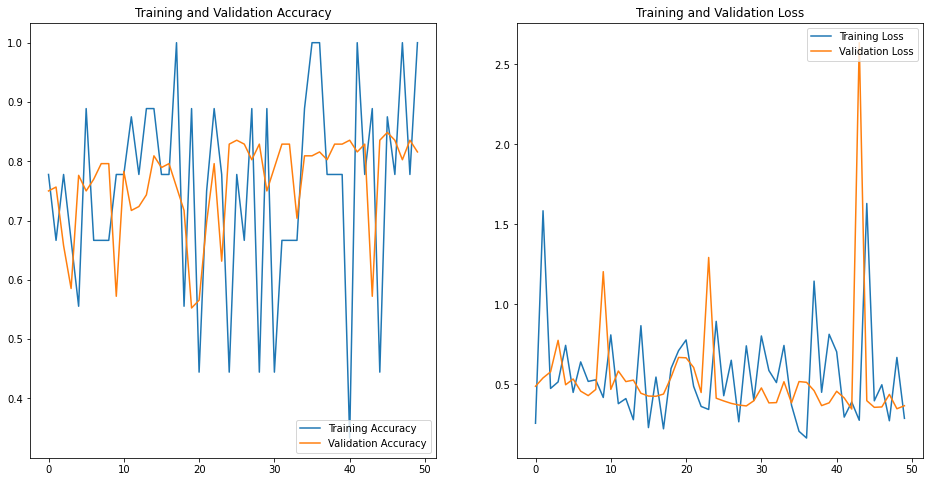

In [ ]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###**Testing the Model**

cataract_test_001.png


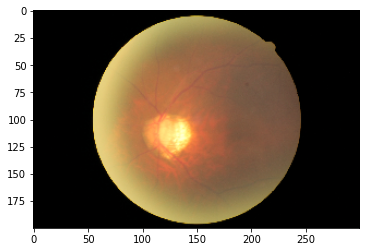

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_002.png


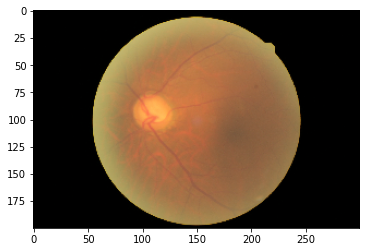

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_003.png


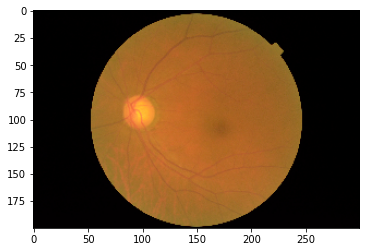

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_005.png


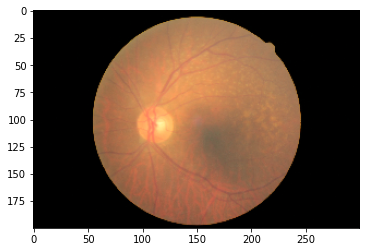

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_006.png


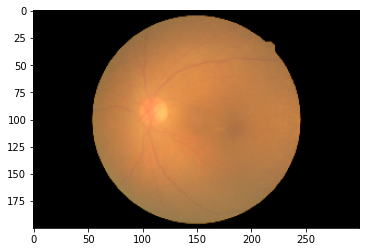

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_007.png


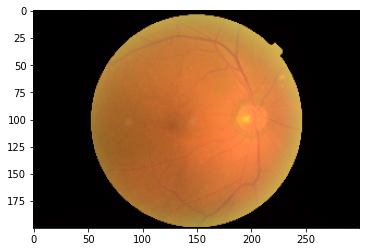

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
cataract_test_008.png


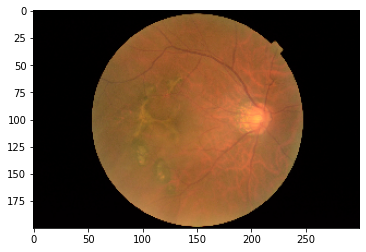

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           
NL_test_001.png


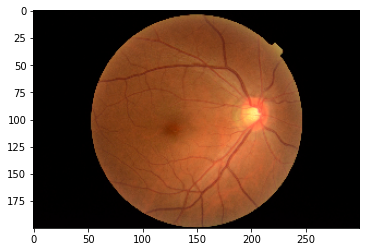

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_002.png


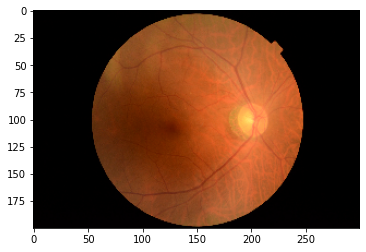

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_003.png


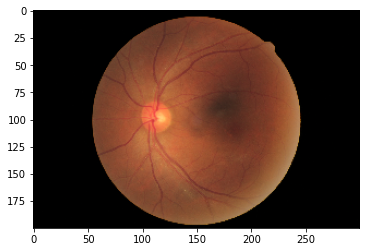

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_004.png


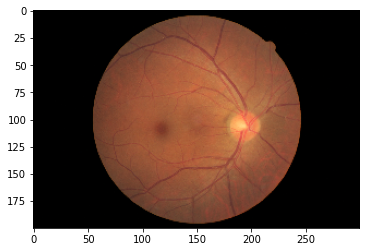

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_005.png


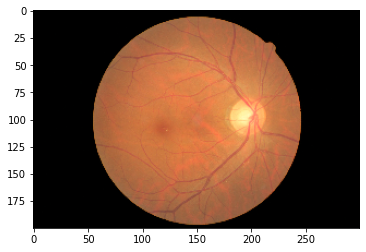

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_006.png


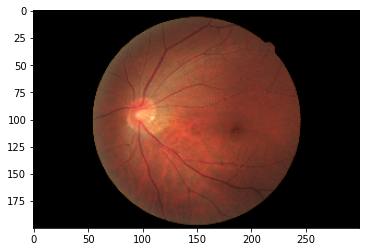

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_007.png


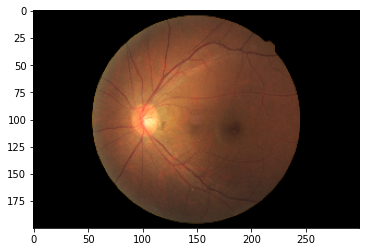

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


NL_test_008.png


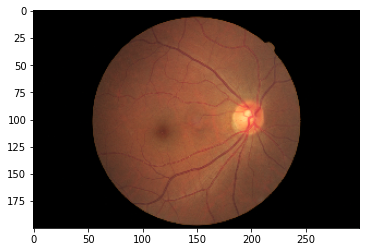

Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.


cataract_test_004.png


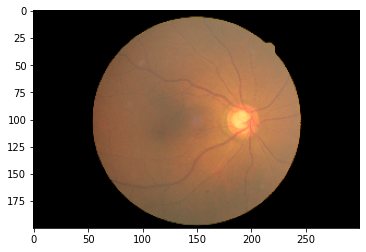

You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           


In [ ]:
from google.colab import files
dir_path = '/content/'
while True:
 try:
  uploaded = files.upload()
  if uploaded=={}:
    break
  for j in uploaded:
    name=j
  for i in os.listdir(dir_path):
    if i==name:
      print(i)
      img = image.load_img(dir_path + '//' + i, target_size=(200,300))
      plt.imshow(img)
      plt.show()

      x = image.img_to_array(img)
      x = np.expand_dims(x, axis = 0)
      images = np.vstack([x])
      val = model.predict(images)

      if val == 1:
        print("""You are suffering from Cataract disease.
Consult an eye surgeon as soon as possible else this might lead to complete blindness.
           
           """)
      else:
        print("""Your eyes are normal and healthy. 
But take good care of your eyes to prevent any ailment in the future.

""")
 except: 
    break